# 기본 행렬

In [2]:
import numpy as np

A = np.array([[3, 4], [1, 2]])
b = np.array([[1], [2]])
C = A @ b
D = np.linalg.inv(A) # 역행렬
E = A.T # 좌우 대칭
F = np.linalg.det(A) # 행렬식

print(D)
print(E)
print(F)

[[ 1.  -2. ]
 [-0.5  1.5]]
[[3 1]
 [4 2]]
2.0000000000000004


# 회전 변환

In [3]:
A = np.array([[np.sqrt(5), 0], [np.sqrt(5), np.sqrt(10)]])
B = np.array([[np.sqrt(10), np.sqrt(5)], [0, np.sqrt(5)]])
print('seterminant', np.linalg.det(B))
C = A @ np.linalg.inv(B)
print('transformation', C)
x = np.array([[3], [1]])
y = C @ x

print(y)

seterminant 7.071067811865476
transformation [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[1.41421356]
 [2.82842712]]


## 시각화

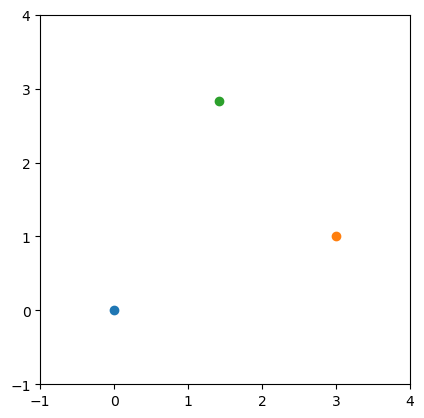

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([0], [0])
ax.scatter(x[0], x[1])
ax.scatter(y[0], y[1])

plt.xlim(-1, 4)
plt.ylim(-1, 4)

ax.set_aspect('equal')
plt.show()

# 첫 시작은 (0, 0)과 (3, 1) 에서 45도 회전된 것.

In [7]:
A = np.array([[3, 4], [1, 2]])
v = np.array([[0.93], [0.36]])

print(A @ v)

[[4.23]
 [1.65]]


In [13]:
import torch

# 가중치 텐서, 자동미분을 통한 기울기 계산 가능
W = torch.autograd.Variable(torch.randn((1,3)).type(torch.FloatTensor), requires_grad = True)
X_train = np.random.normal(0, 1, size = (256, 3))
Y_train = np.empty((X_train.shape[0], 1))
for i in range(X_train.shape[0]):
    Y_train[i,0] = 3 * X_train[i,0] + 4 * X_train[i,1] + 5 * X_train[i,2]

In [15]:
# Adam 옵티마이저를 생성하며, 학습률이 0.1로 설정
optimizer = torch.optim.Adam([W], lr = 0.1)

# 200번의 에폭 동안 반복하고, 각 에폭마다 모든 학습 데이터에 대해 예측값을 계산하며, 평균 제곱 오차 손실을 계산함
for epoch in range(200):
    for i in range(X_train.shape[0]):
        Y_pred = (W.repeat([X_train.shape[0],1,1]) @ torch.FloatTensor(X_train).unsqueeze(2)).squeeze(2)
    loss = torch.nn.functional.mse_loss(Y_pred, torch.FloatTensor(Y_train))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 10 에폭마다 손실과 현재 가중치를 출력시킴
    if epoch % 10 == 1:
        print(loss.detach().numpy(), W.detach().numpy())
        
## 결과적으로 이 코드는 선형 회귀 모델을 학습해 입력 데이터인 X_train에 대한  Y_train 실제 라벨에 가깝게 하는 것을 목표로 함

0.03537323 [[3.0255861 4.025581  5.0253873]]
0.004960569 [[3.014989  4.0148354 5.014308 ]]
0.0029133977 [[3.0267444 4.0266204 5.026804 ]]
0.00025950844 [[3.0146103 4.0147347 5.015033 ]]
1.1771654e-06 [[3.0051324 4.0053444 5.0053535]]
1.3040577e-05 [[3.0019307 4.0020814 5.001988 ]]
3.221644e-06 [[3.0014699 4.0015507 5.001484 ]]
1.5381495e-07 [[3.0015569 4.001601  5.0015707]]
2.84494e-06 [[3.0013301 4.001359  5.001347 ]]
2.6650184e-06 [[3.0006557 4.000675  5.0006695]]
3.4078815e-07 [[2.9999402 3.9999511 4.9999475]]
1.0881986e-07 [[2.9997077 3.999712  4.999709 ]]
1.0109302e-07 [[2.99994   3.9999413 4.999939 ]]
9.3871435e-09 [[3.000102  4.000102  5.0001006]]
9.521883e-09 [[3.0000057 4.000005  5.0000043]]
4.193807e-09 [[2.9999642 3.9999642 4.9999638]]
5.757289e-13 [[3.0000162 4.000017  5.000017 ]]
4.2065798e-10 [[3.0000002 4.0000005 5.0000005]]
2.4424585e-10 [[2.9999948 3.9999945 4.9999943]]
5.3900696e-11 [[3.0000048 4.0000043 5.000005 ]]


- @ => 행렬 곱셈 연산자
- unsqueeze(2) => 차원생성
- squeeze(2) => 차원축소